In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle
import json
from Utils.evaluation import EvaluationMetrics, ActualStats
from Utils.helper import *
from Utils.sample_squads import *

## Innings 1

In [2]:
model_inn1 = tf.keras.models.load_model('Models\Inn1-HeavyDense-ep20to50\cp-0029.h5')
model_inn2 = tf.keras.models.load_model('Models\Inn2-HeavyDenseRequired-ep30to50\cp-0016.h5')

In [3]:
evaluator = EvaluationMetrics(model_inn1, model_inn2,
                              # )
                              "Evaluation/tournament2.pkl")

In [41]:
evaluator.save_object("Evaluation/tournament2.pkl")

In [42]:
# evaluator.display_table()
# evaluator.reinitialize_tournament()
# for _ in range(56):
#     print(f"\n\nMatch number: {evaluator.match_count+1}")
#     evaluator.simulate_match(1)
# evaluator.display_table()
# evaluator.save_object("Evaluation/temp.pkl")

In [43]:
actualstat = ActualStats("Evaluation/actual.pkl")
# actualstat = ActualStats()
# actualstat.run_df(1, True)
# actualstat.run_df(2, True)

In [44]:
from scipy import stats
# stats.ttest_ind(evaluator.total_stat[::2], actualstat.total_stat, equal_var=False)
stats.ks_2samp(evaluator.total_stat, actualstat.total_stat, alternative='two-sided', mode='auto')


KstestResult(statistic=0.0762921751615219, pvalue=0.040769156737355525)

(array([[0.00017007, 0.00034014, 0.00034014, 0.0005102 , 0.00102041,
         0.00221088, 0.00408163, 0.00833333, 0.01173469, 0.01139456,
         0.01496599, 0.01071429, 0.00935374, 0.00867347, 0.00578231,
         0.00306122, 0.00102041, 0.00085034, 0.0005102 , 0.00017007],
        [0.00023929, 0.00059823, 0.00047858, 0.00095717, 0.00119646,
         0.00370902, 0.00526442, 0.00717875, 0.01124671, 0.01196458,
         0.01603254, 0.011486  , 0.01208423, 0.00478583, 0.00430725,
         0.00167504, 0.00119646, 0.00023929, 0.00047858, 0.00011965]]),
 array([ 56. ,  66.5,  77. ,  87.5,  98. , 108.5, 119. , 129.5, 140. ,
        150.5, 161. , 171.5, 182. , 192.5, 203. , 213.5, 224. , 234.5,
        245. , 255.5, 266. ]),
 <a list of 2 BarContainer objects>)

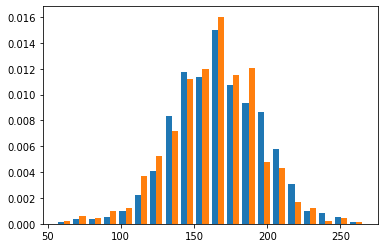

In [48]:
import matplotlib.pyplot as plt
plt.hist([evaluator.total_stat, actualstat.total_stat], density=True, bins=20, label=["Our Simulation", "Actual Matches"])

In [35]:
batsmen_result_dic = {}
bat_stat = evaluator.batsmen_stat
for batsman in bat_stat:
    tot_runs = 0
    tot_balls = 0
    num_4 = 0
    num_6 = 0
    num_inn = 0
    num_out = 0
    hs = 0
    dismissal_type = []
    dismissed_by = []
    for i in bat_stat[batsman]:
        num_inn += 1
        tot_runs += i["Runs"]
        if i["Runs"] > hs:
            hs = i["Runs"]
        tot_balls += i["Balls Faced"]
        num_4 += i["Fours"]
        num_6 += i["Sixes"]
        if i["Dismissal Type"] != "Not Out":
            num_out += 1
        dismissal_type.append(i["Dismissal Type"])
        dismissed_by.append(i["Dismissed By"])
    batsmen_result_dic[batsman] = {
        "Innings": num_inn,
        "Runs": tot_runs,
        "Balls": tot_balls,
        "Fours": num_4,
        "Sixes": num_6,
        "High Score": hs,
        "Average": tot_runs/num_out if num_out!=0 else tot_runs,
        "Strike Rate": tot_runs/tot_balls*100 if tot_balls!=0 else 0,
        "Boundry Percent": (6*num_6+4*num_4)/tot_runs*100 if tot_runs!=0 else 0,
        }

In [36]:
batsmen_stat_df = pd.DataFrame.from_dict(batsmen_result_dic, orient='index')
save_df = batsmen_stat_df.sort_values(by=["Runs", "Balls"], ascending=False)
save_df.to_csv("Evaluation/Evaluate_Batsmen.csv")
save_df.head(20)

,Innings,Runs,Balls,Fours,Sixes,High Score,Average,Strike Rate,Boundry Percent
CH Gayle,140,4495,3340,497,151,125,34.844961,134.580838,64.382647
AM Rahane,140,4456,3454,449,156,121,33.007407,129.009844,61.310592
P Shaw,140,4443,3492,476,147,127,34.441860,127.233677,62.705379
SR Watson,140,4402,3229,480,165,138,34.390625,136.327036,66.106315
JC Buttler,140,4379,3294,485,153,149,33.684615,132.938676,65.266042
Q de Kock,140,4293,3276,445,169,131,33.279070,131.043956,65.082693
PA Patel,140,4225,3074,484,137,148,32.500000,137.443071,65.278107
CA Lynn,140,4201,3135,421,166,145,32.315385,134.003190,63.794335
F du Plessis,140,4153,3112,393,154,134,32.960317,133.451157,60.101132
KL Rahul,140,4131,3263,439,146,132,32.273438,126.601287,63.713387


In [37]:
bowler_result_dic = {}
bowler_stat = evaluator.bowler_stat
for bowler in bowler_stat:
    tot_runs = 0
    tot_balls = 0
    tot_wickets = 0
    for i in bowler_stat[bowler]:
        tot_runs += i["Runs Conceded"]
        tot_balls += i["Balls"]
        tot_wickets += i["Wickets Taken"]
    bowler_result_dic[bowler] = {
        "Runs Conceded": tot_runs,
        "Overs": f"{tot_balls//6}.{tot_balls%6}",
        "Wickets": tot_wickets,
        "Economy": tot_runs/tot_balls*6 if tot_balls != 0 else 0,
        }


In [38]:
bowler_stat_df = pd.DataFrame.from_dict(bowler_result_dic, orient='index')
save_df = bowler_stat_df.sort_values(by=["Wickets", "Economy"], ascending=[False, True])
save_df.to_csv("Evaluation/Evaluate_Bowler.csv")
save_df.head(20)

,Runs Conceded,Overs,Wickets,Economy
DJ Bravo,4439,514.3,175,8.627794
JJ Bumrah,4269,539.2,168,7.915328
RD Chahar,4789,558.3,167,8.574754
C de Grandhomme,4553,549.0,163,8.293260
YS Chahal,4606,555.5,161,8.286657
UT Yadav,3983,510.4,155,7.799608
A Mishra,4326,552.1,155,7.834591
H Viljoen,4409,534.2,154,8.251404
J Archer,4407,502.0,154,8.778884
S Gopal,4762,557.1,153,8.546814
